In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c cifar-10

 96% 689M/715M [00:05<00:00, 126MB/s]
100% 715M/715M [00:05<00:00, 125MB/s]


In [3]:
ls

cifar-10.zip  kaggle.json  sample_data/


In [4]:
from zipfile import ZipFile

dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset is EXTRACTED')

Dataset is EXTRACTED


In [5]:
ls

cifar-10.zip  kaggle.json  sample_data/  sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [36]:
!pip install py7zr

In [7]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall() #path='(path)' to extract to a specif location
archive.close()

In [8]:
ls

cifar-10.zip  sample_data/          test.7z  train.7z
kaggle.json   sampleSubmission.csv  train/   trainLabels.csv


In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
filenames = os.listdir('/content/train')

In [11]:
print(len(filenames))

50000


In [12]:
print(filenames[0])

19327.png


In [13]:
labels_df = pd.read_csv('trainLabels.csv')

In [14]:
labels_df.shape

(50000, 2)

In [15]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [16]:
print(labels_df['label'].value_counts())
labels_list = sorted(labels_df['label'].unique())
print(labels_list)
len(sorted(labels_df['label'].unique()))

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


10

In [17]:
labels_dictionary = {}

i = 0
while i<len(labels_list):
  labels_dictionary[labels_list[i]] = i
  i+=1
print(labels_dictionary)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [18]:
labels = [labels_dictionary[i] for i in labels_df['label']]

In [19]:
print(labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

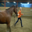

In [20]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/19327.png')
cv2_imshow(img)

In [21]:
id_list = list(labels_df['id'])

In [22]:
train_data_folder = '/content/train/'

data = []

for i in id_list:
  image = Image.open(train_data_folder + str(i) + ".png")
  image = np.array(image)
  data.append(image)

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
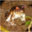

In [25]:
data[0]

In [26]:
x = np.array(data)
y = np.array(labels)

In [27]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [29]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
model.fit(x_train_scale, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2635 - loss: 2.0279 - val_accuracy: 0.3538 - val_loss: 1.8179
Epoch 2/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3500 - loss: 1.8187 - val_accuracy: 0.3642 - val_loss: 1.7704
Epoch 3/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3596 - loss: 1.7775 - val_accuracy: 0.3518 - val_loss: 1.7993
Epoch 4/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3713 - loss: 1.7632 - val_accuracy: 0.3827 - val_loss: 1.7314
Epoch 5/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3745 - loss: 1.7346 - val_accuracy: 0.3898 - val_loss: 1.7274
Epoch 6/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3816 - loss: 1.7263 - val_accuracy: 0.3853 - val_loss: 1.7232
Epoch 7/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3901 - loss: 1.7001 - val_accuracy: 0.3931 - val_loss: 1.7187
Epoch 8/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3942 - loss: 1.6929 - 

In [34]:
accuract, loss = model.evaluate(x_train_scale, y_train)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3924 - loss: 1.6715


In [35]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [40]:
convocational_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convocational_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [42]:
model = models.Sequential()
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(convocational_base)
model.add(layers.Flatten())
model.add(BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [45]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
history = model.fit(x_train_scale, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 560s 393ms/step - accuracy: 0.3296 - loss: 2.0439 - val_accuracy: 0.8158 - val_loss: 0.7238
Epoch 2/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 486s 364ms/step - accuracy: 0.6968 - loss: 1.0229 - val_accuracy: 0.8933 - val_loss: 0.4486
Epoch 3/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 460s 363ms/step - accuracy: 0.8161 - loss: 0.7107 - val_accuracy: 0.9216 - val_loss: 0.3168
Epoch 4/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 496s 358ms/step - accuracy: 0.8818 - loss: 0.5301 - val_accuracy: 0.9218 - val_loss: 0.2948
Epoch 5/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 508s 363ms/step - accuracy: 0.9160 - loss: 0.4137 - val_accuracy: 0.9371 - val_loss: 0.2480
Epoch 6/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 496s 359ms/step - accuracy: 0.9397 - loss: 0.3220 - val_accuracy: 0.9418 - val_loss: 0.2257
Epoch 7/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 502s 359ms/step - accuracy: 0.9563 - loss: 0.2595 - val_accuracy: 0.9400 - val_loss: 0.2299
Epoch 8/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 460s 363ms/step - ac

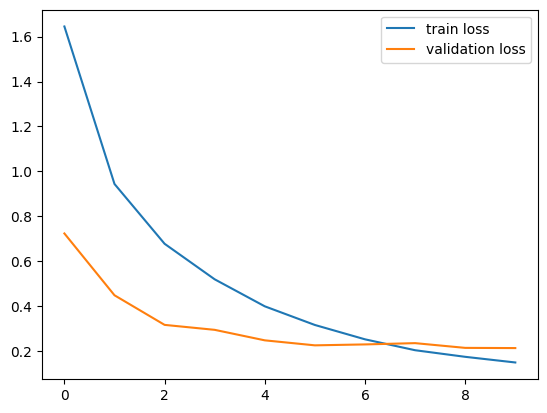

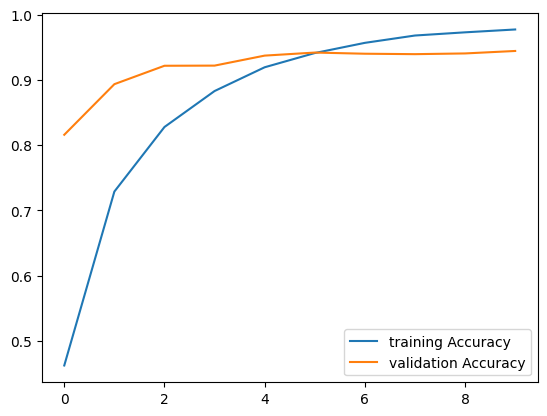

In [49]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='training Accuracy')
plt.plot(h.history['val_accuracy'], label='validation Accuracy')
plt.legend()
plt.show()